#### Imports

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns
import pandas as pd

In [2]:
%matplotlib inline

#### Initializing variables

In [225]:
# Geometry on X
Lx = 1
Nx = 20
dx = Lx/(Nx - 1)

# Geometry on Y
Ly = 1
Ny = 20
dy = Ly/(Ny - 1)

Npoints = Nx*Ny

# Mesh
Xv = np.linspace(0, Lx, Nx)
Yv = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(Xv, Yv)

# Time
dt = 0.001
Nt = 100_000

# Material is Cordierite 
k = 1    #W/(m*K)
cv = 1   #J/(kg*C)
rho = 1 #kg/m3
# k = 2.5    #W/(m*K)
# cv = 900   #J/(kg*C)
# rho = 2300 #kg/m3

alpha = k/(rho*cv)

# Heat Source
Q = 10*rho*cv

# Boundary Conditions
T_left = 0
T_top = 30
T_right = 100
T_bottom = 50

coef = alpha*dt/(dx**2)

In [226]:
# Definition of the Boundary Conditions points
bc_bottom = np.arange(0, Nx, 1)
bc_left= np.arange(Nx, Npoints - Nx, Nx)
bc_top = bc_bottom + Npoints - Nx
bc_right = bc_left + Nx - 1

bc = np.hstack([bc_left, bc_top, bc_right, bc_bottom])
core = np.hstack([np.arange(Nx + 1, 2*Nx - 1, 1) + Nx*j for j in range(0,Ny - 2)])

#### Setup and calculation

In [216]:
def second_deriv_x(T, i, j, k):
    return (T[i, j, k + 1] - 2*T[i, j, k] + T[i, j, k - 1])/dx**2

def second_deriv_y(T, i, j, k):
    return (T[i, j + 1, k] - 2*T[i, j, k] + T[i, j - 1, k])/dy**2

In [ ]:
def pplot(N = 4, start = 0, step = 1):
    nlines = N//2
    fig, axs = plt.subplots(nlines, 2, figsize = (10, 4*nlines))
    fig.tight_layout(pad = 5)

    num_ticks = 11
    # number of points in x and y
    nx = len(Xv)
    ny = len(Yv)
    # the index of the position of yticks
    yticks = np.linspace(0, len(Yv) - 1, num_ticks, dtype=int)
    xticks = np.linspace(0, len(Xv) - 1, num_ticks, dtype=int)

    fmtx = lambda x, pos: '{:.2f}'.format(x*Lx/nx, pos)
    fmty = lambda y, pos: '{:.2f}'.format(y*Ly/ny, pos)

    for i in range(N):
        idxLine = i//2
        idxCol = i % 2

        sns.heatmap(
        T[start + step*i],
        ax = axs[idxLine, idxCol],
        cmap = "Spectral_r")

        axs[idxLine, idxCol].invert_yaxis()
        axs[idxLine, idxCol].set_xticks(xticks)
        axs[idxLine, idxCol].set_yticks(yticks)

        axs[idxLine, idxCol].set(xlabel = r'$x^*$', ylabel = r'$y^*$')
        axs[idxLine, idxCol].set_title('t = %.3e' % (i*dt))
        axs[idxLine, idxCol].xaxis.set_major_formatter(mlp.ticker.FuncFormatter(fmtx))
        axs[idxLine, idxCol].yaxis.set_major_formatter(mlp.ticker.FuncFormatter(fmty))
    
    plt.show()

#### Explicit Method

Definition of the A matrix

In [293]:
# Geometry on X
Lx = 1
Nx = 50
dx = Lx/(Nx - 1)

# Geometry on Y
Ly = 1
Ny = 50
dy = Ly/(Ny - 1)

Npoints = Nx*Ny

# Mesh
Xv = np.linspace(0, Lx, Nx)
Yv = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(Xv, Yv)

# Time
dt = 0.0001
Nt = 100_000

In [294]:
# Definition of the Boundary Conditions points
bc_bottom = np.arange(0, Nx, 1)
bc_left= np.arange(Nx, Npoints - Nx, Nx)
bc_top = bc_bottom + Npoints - Nx
bc_right = bc_left + Nx - 1

bc = np.hstack([bc_left, bc_top, bc_right, bc_bottom])
core = np.hstack([np.arange(Nx + 1, 2*Nx - 1, 1) + Nx*j for j in range(0,Ny - 2)])

In [295]:
A = np.eye(Npoints)
b = np.zeros((Npoints, 1), dtype= 'float64')

for i in core:
    A[i, i]      = 1 - 2*alpha*dt*(1/dx**2 + 1/dy**2)
    A[i, i - 1]  = alpha*dt/dy**2
    A[i, i + 1]  = alpha*dt/dy**2
    A[i, i - Nx] = alpha*dt/dx**2
    A[i, i + Nx] = alpha*dt/dx**2

    b[i] = dt*Q/(rho*cv)

In [296]:
T = np.zeros((Nt, Ny, Nx))

In [297]:
# Initializing BCs
for i in range(Nt):
    for k in range(Ny):
        T[i, k, 0] = T_left
        T[i, k, -1] = T_right

    for j in range(Nx):
        T[i, 0, j] = T_bottom
        T[i, -1, j] = T_top

In [298]:
for i in range(1, Nt):
    previous = np.reshape(T[i - 1], (Npoints, 1))
    temp = A@previous + b
    T[i] = np.reshape(temp, (Nx, Ny))

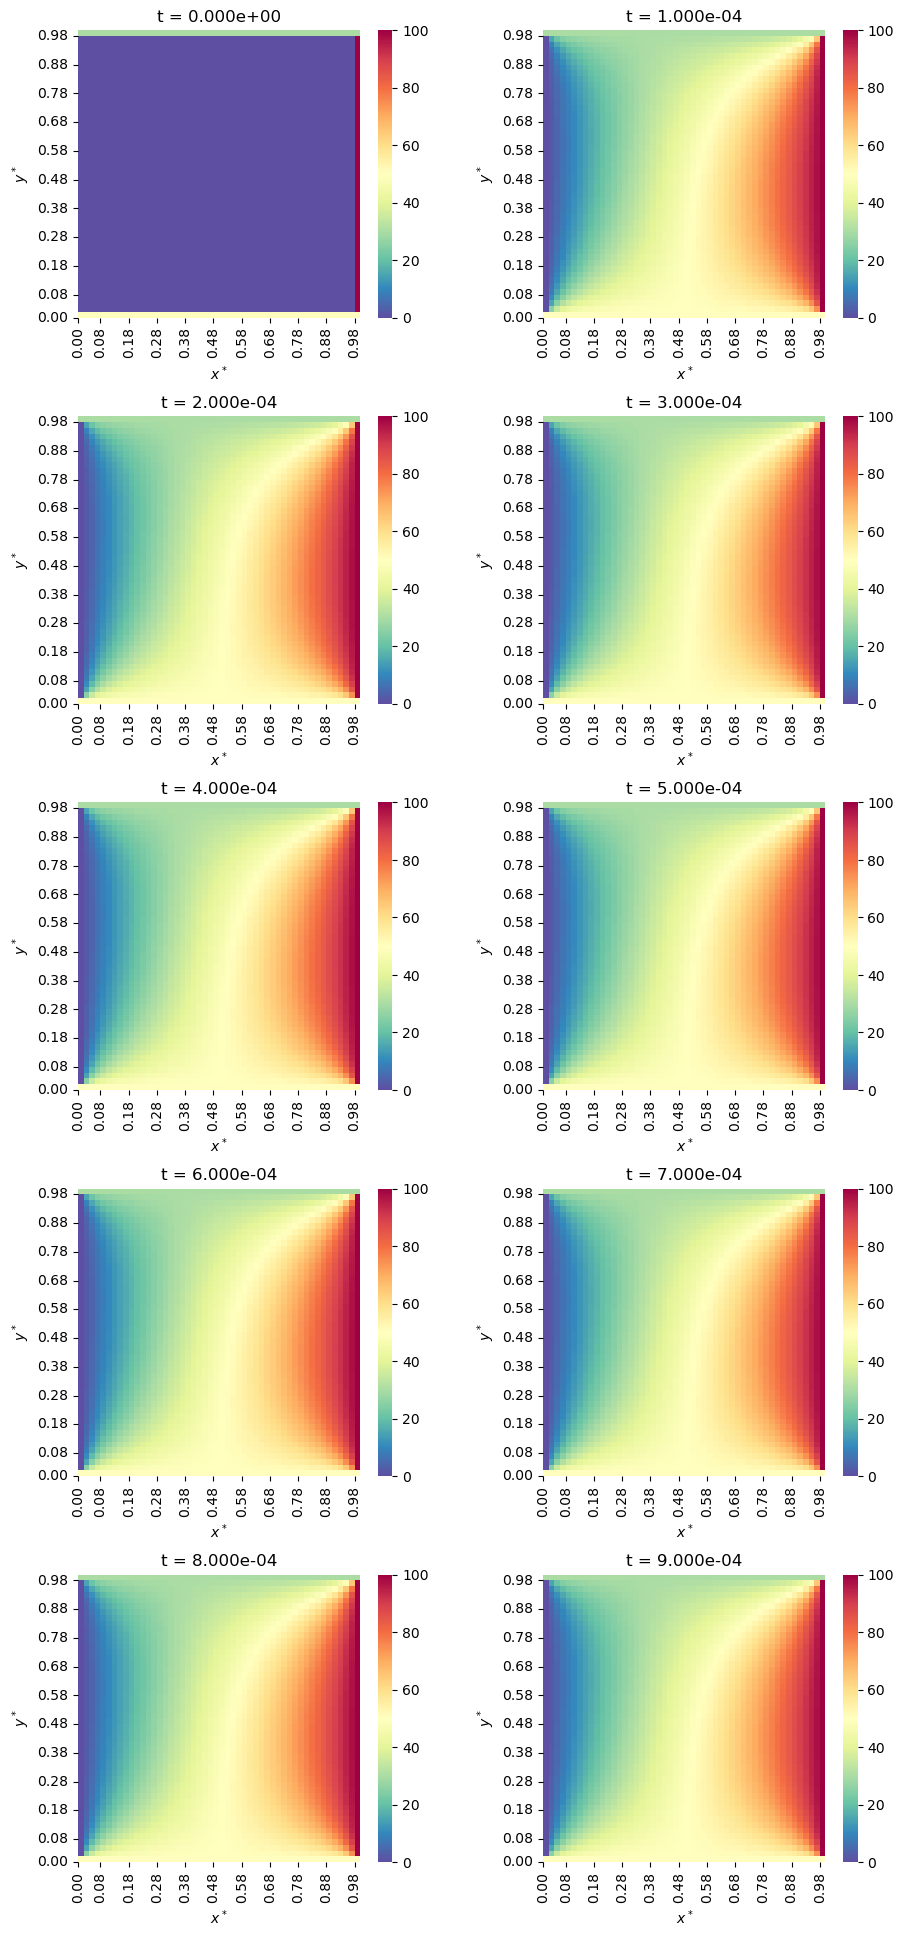

In [299]:
pplot(N = 10, step = 10000)

#### Implicit Method

Definition of the A matrix

In [329]:
# Geometry on X
Lx = 1
Nx = 50
dx = Lx/(Nx - 1)

# Geometry on Y
Ly = 1
Ny = 50
dy = Ly/(Ny - 1)

Npoints = Nx*Ny

# Mesh
Xv = np.linspace(0, Lx, Nx)
Yv = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(Xv, Yv)

# Time
dt = 0.0001
Nt = 100_000

In [330]:
# Definition of the Boundary Conditions points
bc_bottom = np.arange(0, Nx, 1)
bc_left= np.arange(Nx, Npoints - Nx, Nx)
bc_top = bc_bottom + Npoints - Nx
bc_right = bc_left + Nx - 1

bc = np.hstack([bc_left, bc_top, bc_right, bc_bottom])
core = np.hstack([np.arange(Nx + 1, 2*Nx - 1, 1) + Nx*j for j in range(0,Ny - 2)])

In [331]:
A = np.eye(Npoints)
b = np.zeros((Npoints, 1), dtype= 'float64')

for i in core:
    A[i, i]      = 1 + 2*alpha*dt*(1/dx**2 + 1/dy**2)
    A[i, i - 1]  = -alpha*dt/dy**2
    A[i, i + 1]  = -alpha*dt/dy**2
    A[i, i - Nx] = -alpha*dt/dx**2
    A[i, i + Nx] = -alpha*dt/dx**2

    b[i] = dt*Q/(rho*cv)

In [332]:
T = np.zeros((Nt, Ny, Nx))

In [333]:
# Initializing BCs
for i in range(Nt):
    for k in range(Ny):
        T[i, k, 0] = T_left
        T[i, k, -1] = T_right

    for j in range(Nx):
        T[i, 0, j] = T_bottom
        T[i, -1, j] = T_top

In [334]:
Ainv = np.linalg.inv(A)

In [335]:
temp = Ainv@(np.reshape(T[0], (Npoints, 1)) + b)
T[1] = np.reshape(temp, (Nx, Ny))

In [336]:
for i in range(1, Nt):
    previous = np.reshape(T[i - 1], (Npoints, 1))
    temp = Ainv@(previous + b)
    T[i] = np.reshape(temp, (Nx, Ny))

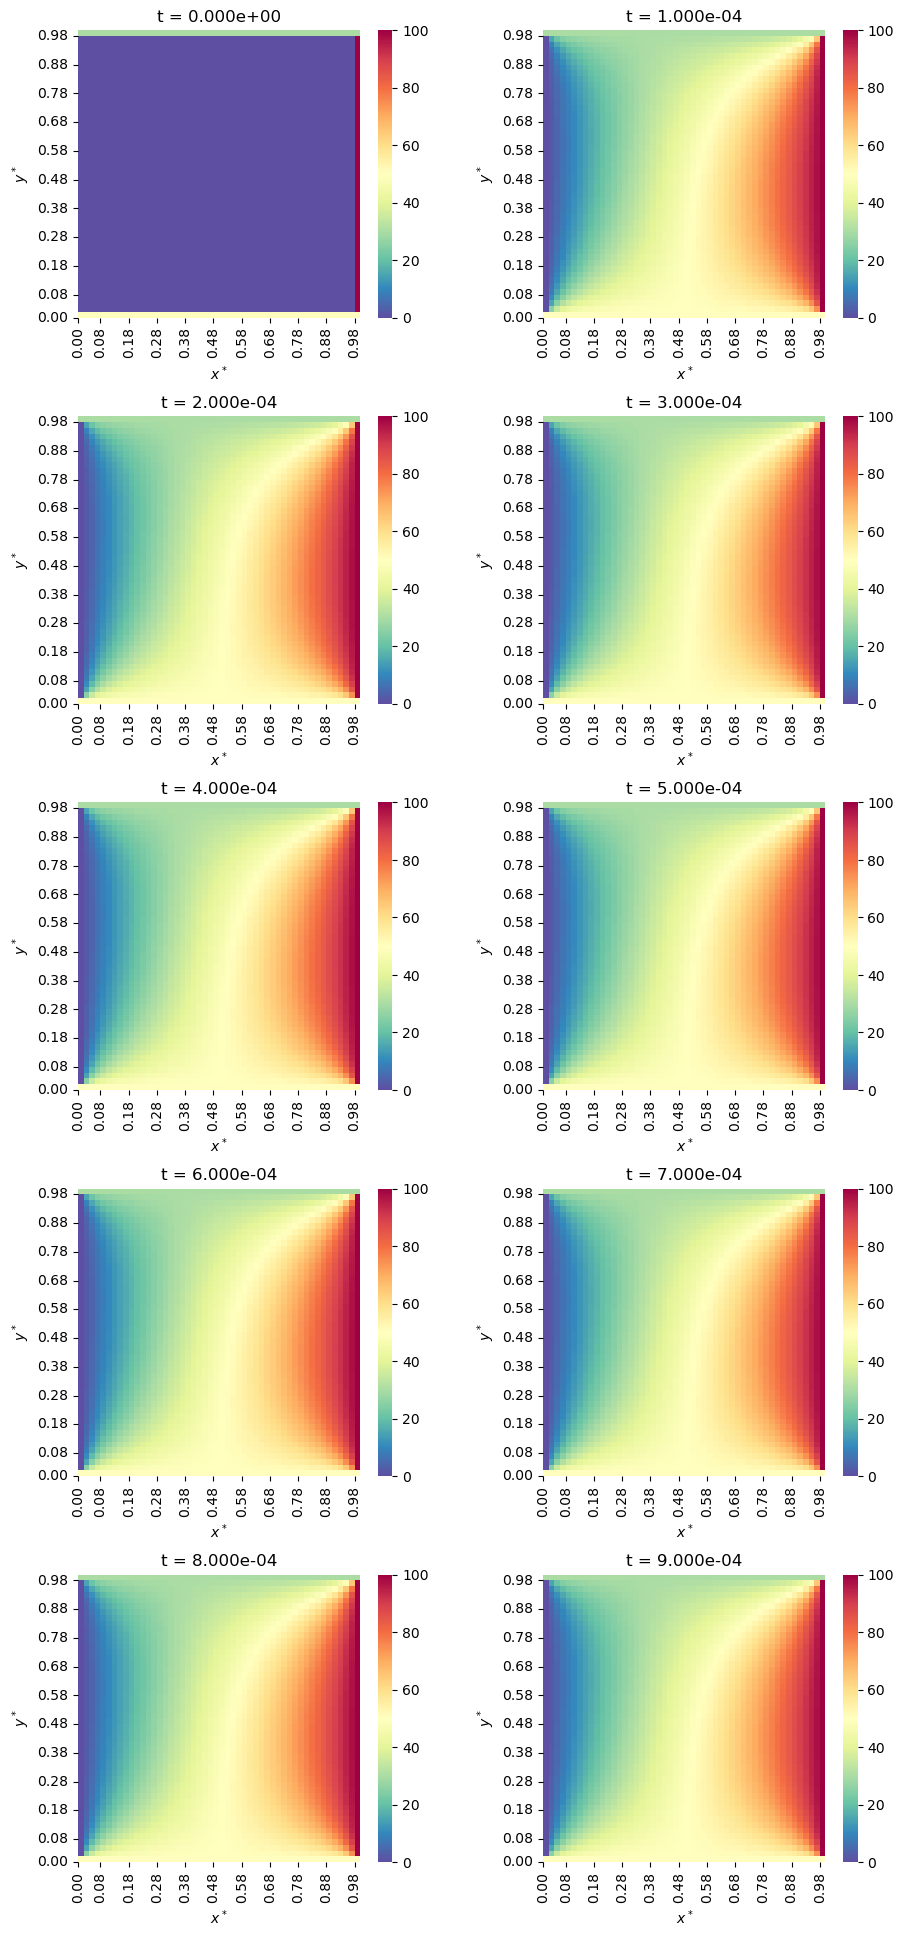

In [337]:
pplot(N = 10, step = 10000)